<a href="https://colab.research.google.com/github/GollyTicker/Food-Recognition-Challenge/blob/main/Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![AIcrowd-Logo](https://raw.githubusercontent.com/AIcrowd/AIcrowd/master/app/assets/images/misc/aicrowd-horizontal.png)

This dataset and notebook correspond to the [Food Recognition Challenge](https://www.aicrowd.com/challenges/food-recognition-challenge) being held on [AIcrowd](https://www.aicrowd.com/).

<p align="right"> Join the communty! <br><a href="https://discord.gg/GTckBMx"><img src="https://img.shields.io/discord/657211973435392011?style=for-the-badge" alt="chat on Discord"></a>
</p>

# <center> 🍕 Food Recognition Challenge: Detectron2 starter kit </center>

<center>This notebook aims to build a model for food detection and segmentation using <code>detectron2</code></center>

# How to use this notebook? 📝
1. **Copy the notebook**. This is a shared template and any edits you make here will not be saved. _You should copy it into your own drive folder._ For this, click the "File" menu (top-left), then "Save a Copy in Drive". You can edit your copy however you like.
2. **Make a submission**. Run all the code in the notebook to get a feel of how the notebook and the submission process works.
3. **Try tweaking the parameters**. If you are new to the problem, a great way to start is try tweaking the configuration flags, train your model and submit again.
4. **Diving into the code**. When you submit via this notebook, we create a repository on [gitlab.aicrowd.com](https://gitlab.aicrowd.com). You can check the code we generated based on this notebook and directly make changes you want there!


# Setup the notebook 🛠

In [1]:
# !bash <(curl -sL https://gitlab.aicrowd.com/jyotish/food-recognition-challenge-detectron2-baseline/raw/master/utils/setup-colab.sh)
!pip install cython numpy aicrowd-api Pillow opencv-python git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

# !pip install -f https://download.pytorch.org/whl/cu101/torch_stable.html torch==1.5 torchvision==0.6
# !pip install -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html detectron2==0.1.2

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-s7iyz6fh
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-s7iyz6fh
     |████████████████████████████████| 118 kB 5.1 MB/s 
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263924 sha256=4e9b0a1af094eb534abfb43b0e50f764108f2f43877415d28805acea394c0e9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-67yiw3s9/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
  Created wheel for aicrowd-api: filename=aicrowd_api-0.1.23-py2.py3-none-any.whl size=9077 sha256=5b06c55bc030b948445b8f9eea7fd348e7fcfcce879d51e9003bb2ec10e3a74a
  Stored in directory: /root/.cache/pip/wheels/0c/43/c9/d6afde4916e82484be857a3d80b3c05b51720ea8bf877d4a5a
Successfully built pycocotools aicrowd-api
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully unins

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 48.0 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 189 kB 48.7 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 270 kB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *
#hide
# test gpu is used
import torch
print(torch.cuda.is_available())
# assert torch.cuda.is_available()

False


In [4]:
!wget -q -O jq https://github.com/stedolan/jq/releases/download/jq-1.6/jq-linux64 && chmod +x jq

In [5]:
#!wget -q -nv https://datasets.aicrowd.com/default/aicrowd-public-datasets/food-recognition-challenge/v0.4/train-v0.4.tar.gz
#!unzip -q -d dataset train-v0.4.tar.gz

#!wget -q -nv https://datasets.aicrowd.com/default/aicrowd-public-datasets/food-recognition-challenge/v0.4/val-v0.4.tar.gz
#!unzip -q -d dataset val-v0.4.tar.gz
!rm -rf *.gz

In [6]:
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/myfoodrepo/round-1/train.tar.gz
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/myfoodrepo/round-1/test_images.tar.gz
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/myfoodrepo/round-1/val.tar.gz

--2021-11-21 01:05:10--  https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/myfoodrepo/round-1/train.tar.gz
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.18, 130.117.252.21, 130.117.252.17, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290012672 (277M) [application/x-gzip]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>] 276.58M  31.9MB/s    in 9.7s    

2021-11-21 01:05:20 (28.6 MB/s) - ‘train.tar.gz’ saved [290012672/290012672]

--2021-11-21 01:05:20--  https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/myfoodrepo/round-1/test_images.tar.gz
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.22, 130.117.252.19, 130.117.252.12, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.22|:443... connected.
HTT

In [7]:
!pwd
!ls

/content
gdrive	jq  sample_data  test_images.tar.gz  train.tar.gz  val.tar.gz


In [8]:
!for f in *.tar.gz; do echo "$f"; tar xf "$f"; done

test_images.tar.gz
train.tar.gz
val.tar.gz


In [9]:
!ls train
!cat train/annotations.json | ./jq . | head -n 50

annotations.json  images
{
  "categories": [
    {
      "id": 1565,
      "name": "bread-wholemeal",
      "name_readable": "Bread, wholemeal",
      "supercategory": "food"
    },
    {
      "id": 1010,
      "name": "potatoes-steamed",
      "name_readable": "Potatoes steamed",
      "supercategory": "food"
    },
    {
      "id": 1085,
      "name": "broccoli",
      "name_readable": "Broccoli",
      "supercategory": "food"
    },
    {
      "id": 2053,
      "name": "butter",
      "name_readable": "Butter",
      "supercategory": "food"
    },
    {
      "id": 1310,
      "name": "hard-cheese",
      "name_readable": "Hard cheese",
      "supercategory": "food"
    },
    {
      "id": 2578,
      "name": "water",
      "name_readable": "Water",
      "supercategory": "food"
    },
    {
      "id": 1154,
      "name": "banana",
      "name_readable": "Banana",
      "supercategory": "food"
    },
    {
      "id": 2620,
      "name": "wine-white",
      "name_readable": "Wi

# Configure static variables 📎

In [10]:
from pathlib import Path
import os
from multiprocessing import Pool
import json

from tqdm.notebook import tqdm
from pycocotools.coco import COCO
import numpy as np
import cv2

class Paths:
  DATASET_DIR = Path(".")
  
  TRAIN_DATA_DIR = DATASET_DIR/"train"
  TRAIN_IMAGES_DIR = TRAIN_DATA_DIR/"images"
  TRAIN_ANNOTATIONS = TRAIN_DATA_DIR/"annotations.json"
  TRAIN_MULTI_SEG_DIR = TRAIN_DATA_DIR/"segmentations"
  
  VAL_DATA_DIR = DATASET_DIR/"val"
  VAL_ANNOTATIONS = VAL_DATA_DIR/"annotations.json"
  VAL_IMAGES_DIR = VAL_DATA_DIR/"images"
  VAL_MULTI_SEG_DIR = VAL_DATA_DIR/"segmentations"

  CURR_DATA_DIR = DATASET_DIR/"curr"
  CURR_IMAGES_DIR = CURR_DATA_DIR/"images"
  CURR_ANNOTATIONS = CURR_DATA_DIR/"annotations.json"
  CURR_MULTI_SEG_DIR = CURR_DATA_DIR/"segmentations"


class DatasetLabels:
  TRAIN = "dataset_train"
  VAL = "dataset_val"

import os
for dirs in [Paths.CURR_IMAGES_DIR,Paths.TRAIN_MULTI_SEG_DIR,Paths.VAL_MULTI_SEG_DIR,Paths.CURR_MULTI_SEG_DIR]:
  os.makedirs(dirs,exist_ok=True)

In [11]:
GDRIVE_MIRROR_ROOT = gdrive/"Food Challenge"/"persistent"/"mirror"
os.makedirs(GDRIVE_MIRROR_ROOT,exist_ok=True)

def store_directory_to_google_drive(relative_dir):
  destination = GDRIVE_MIRROR_ROOT/relative_dir
  print(f"Storing {relative_dir} -> {destination} (target removed before copy)")
  shutil.rmtree(destination, ignore_errors=True)
  shutil.copytree(relative_dir,destination)

def restore_directory_from_google_drive(relative_dir):
  source = GDRIVE_MIRROR_ROOT/relative_dir
  print(f"Restoring {relative_dir} <- {source} (target removed before copy)")
  shutil.rmtree(relative_dir, ignore_errors=True)
  shutil.copytree(source,relative_dir)

In [12]:
# restore precomputed segmentation masks
if False and "we don't want to restore the segmentation masks from google drive, since this is slow. It's slower than computing them directly!":
  try:
    restore_directory_from_google_drive(Paths.TRAIN_MULTI_SEG_DIR)
  except Exception as e:
    e.printStackTrace()

# Packages 🗃

Import here all the packages you need to define your model. 

In [13]:
"""from detectron2.data.datasets import register_coco_instances
import detectron2
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2.data import MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.engine import DefaultPredictor
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.events import get_event_storage
from detectron2.engine import HookBase
"""
0

0

# Loading the data 📲

In [14]:
with open(Paths.TRAIN_ANNOTATIONS) as fp:
  annotations = json.load(fp)
  print(annotations.keys())

dict_keys(['categories', 'info', 'images', 'annotations'])


## Helper functions to clean the dataset

First, we will see if all the annotations in the dataset are properly aligned with the images. These helper functions will let us do that.

In [15]:
image_dir = ""


def validate_annotation(annotation):
  """Check the image dimensions and fix them if needed
  """
  filepath = os.path.join(image_dir, annotation.get("file_name"))
  if not os.path.exists(filepath):
    print("Skipping", filepath)
    return annotation
  img = cv2.imread(filepath)
  if img.shape[0] != annotation.get("height") or img.shape[1] != annotation.get("width"):
    annotation["height"], annotation["width"] = annotation["width"], annotation["height"]
  return annotation


def clean_annotations(annotation_images):
  """Read the image dimensions and fix them in parallel
  """
  annotated_images = []

  with Pool() as p:
    total_images = len(annotation_images)

    with tqdm(total=total_images) as progress_bar:
      for annotation in p.imap(validate_annotation, annotation_images):
        annotated_images.append(annotation)
        progress_bar.update(1)

  return annotated_images

## Clean the training data 🧹

In [16]:
image_dir = Paths.TRAIN_IMAGES_DIR
annotations["images"] = clean_annotations(annotations.get("images"))

with open(Paths.TRAIN_ANNOTATIONS, "w") as fp:
  json.dump(annotations, fp)

  0%|          | 0/5545 [00:00<?, ?it/s]

## Clean the validation data 🧹

In [17]:
image_dir = Paths.VAL_IMAGES_DIR

with open(Paths.VAL_ANNOTATIONS) as fp:
  validation_annotations = json.load(fp)

validation_annotations["images"] = clean_annotations(validation_annotations.get("images"))

with open(Paths.VAL_ANNOTATIONS, "w") as fp:
  json.dump(validation_annotations, fp)

  0%|          | 0/291 [00:00<?, ?it/s]

# My baseline model

In [18]:
coco = COCO(Paths.TRAIN_ANNOTATIONS)

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


In [19]:
category_ids = coco.loadCats(coco.getCatIds())
category_names = [_["name"] for _ in category_ids]

image_ids = coco.getImgIds()

annotation_ids = coco.getAnnIds()
annotations = coco.loadAnns(annotation_ids)

print("Categories: ",", ".join(category_names))

print("Image ids: ", image_ids[:10],"...")

print("Annotation:" , annotations[0].keys())


Categories:  bread-wholemeal, potatoes-steamed, broccoli, butter, hard-cheese, water, banana, wine-white, bread-white, apple, pizza-margherita-baked, salad-leaf-salad-green, zucchini, water-mineral, coffee-with-caffeine, avocado, tomato, dark-chocolate, white-coffee-with-caffeine, egg, mixed-salad-chopped-without-sauce, sweet-pepper, mixed-vegetables, mayonnaise, rice, chips-french-fries, carrot, tomato-sauce, cucumber, wine-red, cheese, strawberries, espresso-with-caffeine, tea, chicken, jam, leaf-spinach, pasta-spaghetti, french-beans, bread-whole-wheat
Image ids:  [16387, 49157, 16394, 49164, 49166, 16398, 49168, 49171, 16409, 49179] ...
Annotation: dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd'])


In [20]:
tiny_train_imids = [12886,22949,49145,54634]

import shutil

# create currently trained on dataset

for imid in tiny_train_imids:
  im = coco.loadImgs(imid)[0]
  shutil.copy(Paths.TRAIN_IMAGES_DIR/im['file_name'], Paths.CURR_IMAGES_DIR/im['file_name'])


shutil.copy(Paths.TRAIN_ANNOTATIONS, Paths.CURR_ANNOTATIONS)

Path('curr/annotations.json')

In [21]:
!ls curr
!ls curr/images

annotations.json  images  segmentations
012886.jpg  022949.jpg	049145.jpg  054634.jpg


In [22]:
[catdict["name"] for catdict in category_ids]

['bread-wholemeal',
 'potatoes-steamed',
 'broccoli',
 'butter',
 'hard-cheese',
 'water',
 'banana',
 'wine-white',
 'bread-white',
 'apple',
 'pizza-margherita-baked',
 'salad-leaf-salad-green',
 'zucchini',
 'water-mineral',
 'coffee-with-caffeine',
 'avocado',
 'tomato',
 'dark-chocolate',
 'white-coffee-with-caffeine',
 'egg',
 'mixed-salad-chopped-without-sauce',
 'sweet-pepper',
 'mixed-vegetables',
 'mayonnaise',
 'rice',
 'chips-french-fries',
 'carrot',
 'tomato-sauce',
 'cucumber',
 'wine-red',
 'cheese',
 'strawberries',
 'espresso-with-caffeine',
 'tea',
 'chicken',
 'jam',
 'leaf-spinach',
 'pasta-spaghetti',
 'french-beans',
 'bread-whole-wheat']

In [24]:
fai_multi_cats_from_coco_ids = Pipeline([MultiCategorize(vocab=[catdict["id"] for catdict in category_ids]),
                                         OneHotEncode(c=len(category_ids)),
                                         Transform(enc = lambda tensor_mcat: np.array(tensor_mcat,dtype=np.int8), dec = TensorMultiCategory, order=2)
                                         ])

coco_cat_id_to_name = lambda coco_cat_id : list(filter(lambda catdict: catdict["id"] == coco_cat_id, category_ids))[0]["name"]
fai_multi_cats_to_names = Transform(lambda fai_cats: list(map(coco_cat_id_to_name, fai_multi_cats_from_coco_ids.decode(fai_cats))))

print(category_ids[0])
print(category_ids[35])
print(category_ids[24])

print(fai_multi_cats_from_coco_ids)

example_categories = fai_multi_cats_from_coco_ids([1565,2099,1468])
print("bread-wholemeal,jam,rice ->", example_categories)

print("bread-wholemeal,jam,rice -> ", fai_multi_cats_to_names(example_categories))

{'id': 1565, 'name': 'bread-wholemeal', 'name_readable': 'Bread, wholemeal', 'supercategory': 'food'}
{'id': 2099, 'name': 'jam', 'name_readable': 'Jam', 'supercategory': 'food'}
{'id': 1468, 'name': 'rice', 'name_readable': 'Rice', 'supercategory': 'food'}
Pipeline: MultiCategorize -- {'vocab': [1565, 1010, 1085, 2053, 1310, 2578, 1154, 2620, 1566, 1151, 2939, 1040, 1070, 2580, 2512, 1056, 1069, 2131, 2521, 2022, 1026, 1068, 1022, 2750, 1468, 1013, 1078, 2738, 1061, 2618, 1311, 1163, 2504, 2498, 1788, 2099, 1032, 1505, 1058, 1554], 'sort': False, 'add_na': False} -> OneHotEncode -- {'c': 40} -> <lambda>
bread-wholemeal,jam,rice -> [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
bread-wholemeal,jam,rice ->  ['bread-wholemeal', 'rice', 'jam']


In [25]:
example_mini_image_masks = np.zeros((len(category_ids),3,3),dtype=np.int8)

example_mini_image_masks[2] = np.array([[1,1,1],[1,1,0],[1,0,0]])
example_mini_image_masks[5] = np.array([[1,0,0],[1,1,0],[1,1,1]])

print(example_mini_image_masks.shape)

example_mini_image_masks[:6]

for i in range(3):
  for j in range(3):
    print(f"{i},{j} -> ",fai_multi_cats_from_coco_ids.decode(example_mini_image_masks[:,i,j]))

(40, 3, 3)
0,0 ->  [1085, 2578]
0,1 ->  [1085]
0,2 ->  [1085]
1,0 ->  [1085, 2578]
1,1 ->  [1085, 2578]
1,2 ->  []
2,0 ->  [1085, 2578]
2,1 ->  [2578]
2,2 ->  [2578]


48984 480 479


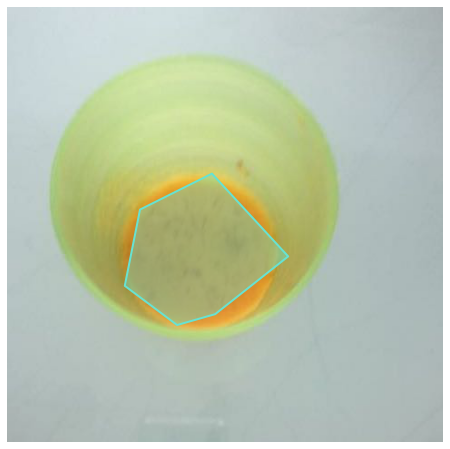

In [104]:
import random
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

imid = 30573
imid = 16387
imid = random.choice(image_ids)
im = coco.loadImgs(imid)[0]
im_annotations = coco.loadAnns(coco.getAnnIds(imgIds=imid))

image_path = os.path.join(Paths.TRAIN_IMAGES_DIR, im["file_name"])
plt.figure(figsize=(8,8))
I = io.imread(image_path)
plt.imshow(I)
plt.axis('off')
# Render annotations on top of the image
coco.showAnns(im_annotations)

print(imid,im["width"],im["height"])

In [27]:
def one_hot_id_from_coco_id(coco_id):
  return np.nonzero(fai_multi_cats_from_coco_ids([coco_id]))[0][0]

def convert_annotations_to_multimask(im_annotations, image_dict, debug=False):
  """Produces a mask of shape [N_CLASSES, w, h] where each seg_pixel (c,x,y) is either 1 (in class) or 0"""

  multi_seg_mask = np.zeros((len(category_ids), image_dict["width"], image_dict["height"]),dtype=np.int8)

  if debug:
    print("Image id", image_dict['id'])
    print("Image shape: ", image_dict['width'], image_dict['height'])

  for im_anno in im_annotations:
    encSeg = cocomask.frPyObjects(
        im_anno['segmentation']
        ,image_dict['width'], image_dict['height']
      )
    
    one_hot_id = one_hot_id_from_coco_id(im_anno["category_id"])
    
    if debug:
      print("Processing",im_anno['category_id'],"->",one_hot_id)
    
    org_seg = cocomask.decode(encSeg)

    if debug:
      print("Org seg shape ", org_seg.shape)
      print("Number of components of this label ", org_seg.shape[2])

    multi_component_segmentations = org_seg.reshape((image_dict['width'], image_dict['height'],-1))

    if debug:
      print("multi_component_segmentations.shape ", multi_component_segmentations.shape)

    category_seg = np.sum(multi_component_segmentations, axis=2)
    np.clip(category_seg,0,1,out=category_seg)

    assert category_seg.shape == (image_dict["width"],image_dict["height"])

    multi_seg_mask[one_hot_id] = category_seg

  return multi_seg_mask

Image id 16387
Image shape:  479 479
Processing 1565 -> 0
Org seg shape  (479, 479, 1)
Number of components of this label  1
multi_component_segmentations.shape  (479, 479, 1)
Processing 1010 -> 1
Org seg shape  (479, 479, 2)
Number of components of this label  2
multi_component_segmentations.shape  (479, 479, 2)
component = 0


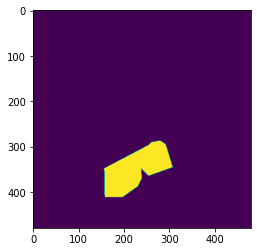

mask


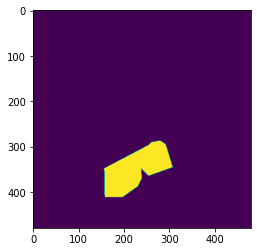

component = 0


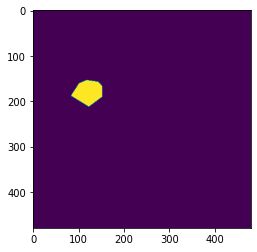

component = 1


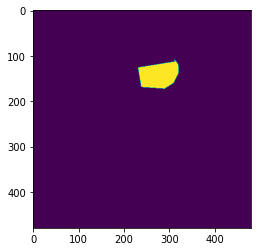

mask


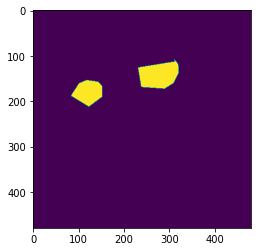

In [28]:
# test multi-label segmentation is correctly converted

import pycocotools
import pycocotools.mask as cocomask

result = convert_annotations_to_multimask(im_annotations,im,debug=True)

assert result.shape == (40, im["width"], im["height"])

for im_anno in im_annotations:
  encSeg = cocomask.frPyObjects(
      im_anno['segmentation']
      ,im['width'], im['height']
    )
  
  one_hot_id = one_hot_id_from_coco_id(im_anno['category_id'])

  m = cocomask.decode(encSeg)

  m = m.reshape((im['width'], im['height'], -1))
  for i in range(m.shape[2]):
    print("component =",i)
    plt.imshow(m[:,:,i])
    plt.show()
  
  print("mask")
  plt.imshow(result[one_hot_id])
  plt.show()

  assert np.all(m.sum(axis=2) == result[one_hot_id])

In [39]:
# Transform given annotations into our desired segmentations format

dest_segmentations_dir = None

FORCE_RECOMPUTE = False

def task(im_id):
  try:
    out_file = dest_segmentations_dir / f"{im_id}.npz"

    if os.path.isfile(out_file) and not FORCE_RECOMPUTE:
      return
    
    image_dict = coco.loadImgs(im_id)[0]
    im_annotations = coco.loadAnns(coco.getAnnIds(imgIds=im_id))
    multi_mask = convert_annotations_to_multimask(im_annotations, image_dict, debug=False)
    np.savez_compressed(out_file, multi_mask, allow_pickle=False)
  except Exception as e:
    print("Error: ", im_id)
    raise e

def preprocess_and_store_segmentations(im_ids):

  with Pool() as p:

    with tqdm(total=len(im_ids)) as progress_bar:

      for _ in p.imap(task, im_ids):
        progress_bar.update(1)


In [40]:
def load_multi_segmentation(path):
  arr = None
  with np.load(path) as npz:
    arr = npz["arr_0"]
  return arr

In [30]:
dest_segmentations_dir = Paths.CURR_MULTI_SEG_DIR
preprocess_and_store_segmentations(tiny_train_imids)
print(list(os.listdir(Paths.CURR_MULTI_SEG_DIR))[:5],"...")

if not "transform train data":
  dest_segmentations_dir = Paths.TRAIN_MULTI_SEG_DIR
  preprocess_and_store_segmentations(image_ids)
  print(list(os.listdir(Paths.TRAIN_MULTI_SEG_DIR))[:5],"...")



  0%|          | 0/4 [00:00<?, ?it/s]

['22949.npz', '54634.npz', '49145.npz', '12886.npz'] ...


In [31]:
if FORCE_RECOMPUTE and not "we will not store it to google drive due ot it's slow read speed":
  store_directory_to_google_drive(Paths.TRAIN_MULTI_SEG_DIR)

In [139]:
# fastai delegation decorator: https://www.fast.ai/2019/08/06/delegation/

SEED=1337
# Attempts at a multi-label segmentation loader for fastai
# How to write a data block: https://docs.fast.ai/tutorial.datablock.html#Building-a-DataBlock-from-scratch
class MultiLabelSegmentationDataLoaders(DataLoaders):
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_label_func(cls, path, fnames, label_func, valid_pct=0.2, seed=None, codes=None, item_tfms=None, batch_tfms=None, **kwargs):
        "Create from list of `fnames` in `path`s with `label_func`."
        dblock = DataBlock(blocks=(ImageBlock, TransformBlock),#todo. old: MaskBlock(codes=codes)), todo. set c = number of classes
                           splitter=RandomSplitter(valid_pct, seed=seed),
                           get_y=label_func,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        res = cls.from_dblock(dblock, fnames, path=path, **kwargs)
        return res

if not "fails due to unsupported multi-label segmetations. images cannot be loaded from npy format anyways":
  # IGNORE ME!!
  dls = SegmentationDataLoaders.from_label_func(
      Paths.CURR_DATA_DIR, bs=8, fnames = get_image_files(Paths.CURR_IMAGES_DIR),
      label_func = lambda o: Paths.CURR_MULTI_SEG_DIR/f"{int(o.stem)}.npz",
      codes = category_ids
  )

resize_args = (256, ResizeMethod.Crop)

def resize_mseg(mseg):
  assert len(mseg.shape) == 3

  destx = desty = resize_args[0]
  xm, ym = mseg.shape[1], mseg.shape[2]

  initx = xm//2 - (destx//2)
  inity = ym//2 - (desty//2)    

  cropped = mseg[:,initx:(initx+destx), inity:(inity+desty)]
  
  assert cropped.shape == (mseg.shape[0], destx, desty)
  return cropped

fnames = get_image_files(Paths.CURR_IMAGES_DIR)

dls = MultiLabelSegmentationDataLoaders.from_label_func(
  Paths.CURR_DATA_DIR, bs=len(fnames), fnames = fnames,
  label_func = lambda o: resize_mseg(load_multi_segmentation(Paths.CURR_MULTI_SEG_DIR/f"{int(o.stem)}.npz")),
  codes = category_ids,
  item_tfms=Resize(*resize_args), # todo. actual resizing needs to happen here
  seed = SEED
)


In [140]:
#mseg = load_multi_segmentation(Paths.CURR_MULTI_SEG_DIR/"22949.npz")
#res = resize_mseg(mseg)
#res.shape

In [141]:
def resize_image_to_shape(image, shape):
  pass #np.resize(image, shape, )

# blk = ImageBlock(PILImage)

In [147]:
print(dls.train)

print(dls.valid)


# learn = unet_learner(dls, resnet34)
learn = cnn_learner(dls, resnet34, n_out = len(category_ids), loss_func = lambda x, y: torch.linalg.norm(x - y[:,:,0,0]))
# todo.print(x.shape,y.shape)

# print(learn.model)

# todo. transform segmentation and data to be resized to a specific size -> data blocks
# todo. how might we make this a fully convolutional pipeline?

learn.fine_tune(1)

if False:
  unet_learner(
    dls, models.alexnet,
    normalize=True, n_out=len(category_ids),
    pretrained=True, config=None,
    loss_func=None, opt_func=Adam,
    lr=0.001, metrics=None,
    model_dir='models', train_bn=True,
    blur=False, blur_final=True,
    self_attention=False, y_range=None, last_cross=True,
    bottle=False, norm_type=None
  )


#learn.fine_tune(16)


epoch,train_loss,valid_loss,time
0,24.642445,None,00:02


/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,time
0,24.981798,None,00:03


In [33]:
!ls curr/segmentations

12886.npz  22949.npz  49145.npz  54634.npz


# Initialize detectron2

In [ ]:
_ = setup_logger()

register_coco_instances(DatasetLabels.TRAIN, {}, Paths.TRAIN_ANNOTATIONS, Paths.TRAIN_IMAGES_DIR)
register_coco_instances(DatasetLabels.VAL, {}, Paths.VAL_ANNOTATIONS, Paths.VAL_IMAGES_DIR)

# Build your Model 🏭

We will use Mask R-CNN to generate the segmentation masks for the food items 🌯

## Configure detectron2

Detectron2 has a variety of Instance Segmentation Models. We will use the zoo model with Mask RCNN + ResNet 50. If you want to try other models, you can find them [here]((https://github.com/facebookresearch/detectron2).

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = (DatasetLabels.TRAIN,)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 273  # Number of output classes

cfg.OUTPUT_DIR = "outputs"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

## Load the pre-trained weights 

In [ ]:
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2

## Hyperparameters

In [ ]:
cfg.SOLVER.BASE_LR = 0.00025  # Learning Rate
cfg.SOLVER.MAX_ITER = 20000  # MAx Iterations
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # Batch Size

# Train the model 🚂

We will setup tensorboard to check the performance of the model while it is training.

## Setting up Tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir outputs

## Train the Model

In [ ]:
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

# Evaluating the model 🧪

We will check the performance of our model on the validation dataset.

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = (DatasetLabels.VAL, )
predictor = DefaultPredictor(cfg)

## Generate predictions on validation data 

In [ ]:
evaluator = COCOEvaluator(DatasetLabels.VAL, cfg, False, output_dir=cfg.OUTPUT_DIR)
data_loader = build_detection_test_loader(cfg, DatasetLabels.VAL)
results = inference_on_dataset(predictor.model, data_loader, evaluator)

## Visualizing the results 👓

Numbers are good, but visualizations are better!

In [ ]:
metadata = MetadataCatalog.get(DatasetLabels.VAL)

# Load the training annotations if not loaded
if not validation_annotations:
  with open(Paths.VAL_ANNOTATIONS) as json_file:
      annotations = json.load(json_file)

## Check the predictions

**Note:** If you are not able to see segmentation masks on the images, that generally means that the model didn't predict a mask for that image. You can verify this by doing

```python
predictions = predictor(img)
print(predictions)
```

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 180


# Visualize some random images
for i in range(8):
  image_filename = np.random.choice(validation_annotations.get("images")).get("file_name")
  image_filename = os.path.join(Paths.VAL_IMAGES_DIR, image_filename)

  img = cv2.imread(image_filename)
  predictions = predictor(img)

  v = Visualizer(img[:, :, ::-1],
    metadata=metadata, 
    scale=0.5, 
    # instance_mode=ColorMode.IMAGE_BW
  )
  annotated_image = v.draw_instance_predictions(predictions["instances"].to("cpu"))

  plt.subplot(2, 4, i+1)
  plt.axis('off')
  plt.imshow(annotated_image.get_image())

# A note on class ID mappings

Here is how the category object looks like

```json
{
  "id": 2578,
  "name": "water",
  "name_readable": "Water",
  "supercategory": "food"
}
```

Detectron2 usually maps the category IDs to contiguous numbers. For example, consider the following categories,

```json
[
  {
    "id": 2578,
    "name": "water",
    "name_readable": "Water",
    "supercategory": "food"
  },
  {
    "id": 1157,
    "name": "pear",
    "name_readable": "Pear",
    "supercategory": "food"
  },
  {
    "id": 2022,
    "name": "egg",
    "name_readable": "Egg",
    "supercategory": "food"
  }
]
```

Detectron internally maps these categories to something like

```json
{
  0: 2578, # detectron_id: actual_class_id
  1: 1157,
  2: 2022
}
```

So, when your model detects water, the prediction class ID that your model returns will be `0` and **not** `2578` . You should make sure to map these detectron IDs to their original actual class IDs for your submission to get scored properly.

Here's how you can get this mapping.

In [ ]:
coco_api = COCO(Paths.TRAIN_ANNOTATIONS)

category_ids = sorted(coco_api.getCatIds())
categories = coco_api.loadCats(category_ids)

class_to_category = { int(class_id): int(category_id) for class_id, category_id in enumerate(category_ids) }

with open("class_to_category.json", "w") as fp:
  json.dump(class_to_category, fp)

loading annotations into memory...
Done (t=2.93s)
creating index...
index created!


# Ready? Submit to AIcrowd 🚀

Now you can submit the trained model to AIcrowd!

## Submission configuration ⚙️

In [ ]:
aicrowd_submission = {
    "author": "<your name>",
    "username": "<your aicrowd username>",
    "description": "initial submission with detectron",
    "debug": False,
    "model_path": "outputs/model_final.pth",
    "model_type": "model_zoo",
    "model_config_file": "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml",
    "detectron_model_config": {
      "ROI_HEADS": {
        "SCORE_THRESH_TEST": 0.5,
        "NUM_CLASSES": 273
      }
    }
}

aicrowd_submission["description"] = aicrowd_submission["description"].replace(" ", "-")
with open("aicrowd.json", "w") as fp:
  json.dump(aicrowd_submission, fp)

## Submit to AIcrowd

**Note:** We will create an SSH key on your google drive. This key will be used to identify you on gitlab.aicrowd.com.

In [ ]:
!bash <(curl -sL https://gitlab.aicrowd.com/jyotish/food-recognition-challenge-detectron2-baseline/raw/master/utils/submit-colab.sh)

# 📎 Important Links

* 💪 Challenge Page: https://www.aicrowd.com/challenges/food-recognition-challenge
* 🗣 Discussion Forum: https://discourse.aicrowd.com/c/food-recognition-challenge
* 🏆 Leaderboard: https://www.aicrowd.com/challenges/food-recognition-challenge/leaderboards  